In [ ]:
import sys
sys.path.append('drive/MyDrive')

import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table
import seaborn as sns

import dndrv


sns.set()

In [ ]:
results = []
for ac in range(1, 26):
  to_hit, crit_rv = dndrv.d20_outcome(dndrv.D20
                                      , threshold=ac
                                      , modifier=8
                                      , crit_fail_values=[1]
                                      , crit_success_values=[20]
                                      , return_critical=True
                                     )
  dmg_single = 4 + dndrv.D4
  result_single = to_hit * (dmg_single + crit_rv*dmg_single)
  result_total = sum([result_single] * 10)
  results.append([ac, result_total.mean()])

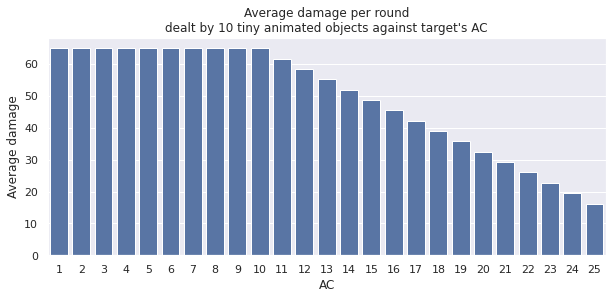

In [ ]:
plt.figure(figsize=(10, 4))
df = pd.DataFrame(results, columns=['AC', 'mean_damage'])
ax = sns.barplot(x='AC', y='mean_damage', data=df, color='b')
ax.set_title('Average damage per round\n'
             'dealt by 10 tiny animated objects against target\'s AC'
            )
ax.set_ylabel('Average damage')
plt.savefig('animate_objects.png')

In [ ]:
winners = []
probs = []
for dc in range(1, 31):
  warcaster = dndrv.d20_outcome(dndrv.D20_ADV
                                , threshold=dc
                               ).pk[1]
  row = []
  probs_row = []
  for bonus in range(2, 8):
    resilient = dndrv.d20_outcome(dndrv.D20
                                  , threshold=dc
                                  , modifier=bonus
                                 ).pk[1]
    diff = resilient - warcaster
    probs_row.append(f'w: {warcaster:.4f} | r: {resilient:.4f}')
    if abs(diff) < 1e-5:
      row.append('equal')
    elif diff > 0:
      row.append('resilient')
    elif diff < 0:
      row.append('warcaster')
  winners.append(row)
  probs.append(probs_row)

def df_color(value):

  if value == 'resilient':
    color = '#779ecb'
  elif value == 'warcaster':
    color = '#ff6961'
  else:
    color = '#d5d5d5'

  return f'color: {color}'

In [ ]:
(
  pd.DataFrame(winners
               , columns=range(2, 8)
               , index=range(1, 31)
              ).rename_axis('DC')
               .rename_axis('Total bonus from Resilient', axis='columns')
              #  .style.applymap(df_color)
              #        .set_caption('Colormaps, with a caption.')
)

Total bonus from Resilient,2,3,4,5,6,7
DC,,,,,,
1,equal,equal,equal,equal,equal,equal
2,resilient,resilient,resilient,resilient,resilient,resilient
3,resilient,resilient,resilient,resilient,resilient,resilient
4,warcaster,resilient,resilient,resilient,resilient,resilient
5,warcaster,warcaster,resilient,resilient,resilient,resilient
6,warcaster,warcaster,resilient,resilient,resilient,resilient
7,warcaster,warcaster,warcaster,resilient,resilient,resilient
8,warcaster,warcaster,warcaster,resilient,resilient,resilient
9,warcaster,warcaster,warcaster,resilient,resilient,resilient


In [ ]:
def df_probs_color(value):
  
  w = float(value[3:9])
  r = float(value[15:21])
  diff = r - w
  if abs(diff) < 1e-5:
    color = '#d5d5d5'
  elif diff > 0:
    color = '#ff6961'
  elif diff < 0:
    color = '#779ecb'

  return f'color: {color}'

def columns_bg_dark(column):
  return ['background-color: #454545' for element in column]

def columns_bg_light(column):
  return ['background-color: #383838' for element in column]

(
  pd.DataFrame(probs
               , columns=range(2, 8)
               , index=range(1, 31)
              ).rename_axis('Save DC')
               .rename_axis('Total bonus from Resilient', axis='columns')
               .style
                    #  .applymap(df_probs_color)
                     .apply(columns_bg_dark, axis='rows', subset=[2, 4, 6])
                     .apply(columns_bg_light, axis='rows', subset=[3, 5, 7])
                     .set_caption('Probability of a successful Concentration save: War Caster vs. Resilient')
)

Total bonus from Resilient,2,3,4,5,6,7
Save DC,,,,,,
1,w: 1.0000 | r: 1.0000,w: 1.0000 | r: 1.0000,w: 1.0000 | r: 1.0000,w: 1.0000 | r: 1.0000,w: 1.0000 | r: 1.0000,w: 1.0000 | r: 1.0000
2,w: 0.9975 | r: 1.0000,w: 0.9975 | r: 1.0000,w: 0.9975 | r: 1.0000,w: 0.9975 | r: 1.0000,w: 0.9975 | r: 1.0000,w: 0.9975 | r: 1.0000
3,w: 0.9900 | r: 1.0000,w: 0.9900 | r: 1.0000,w: 0.9900 | r: 1.0000,w: 0.9900 | r: 1.0000,w: 0.9900 | r: 1.0000,w: 0.9900 | r: 1.0000
4,w: 0.9775 | r: 0.9500,w: 0.9775 | r: 1.0000,w: 0.9775 | r: 1.0000,w: 0.9775 | r: 1.0000,w: 0.9775 | r: 1.0000,w: 0.9775 | r: 1.0000
5,w: 0.9600 | r: 0.9000,w: 0.9600 | r: 0.9500,w: 0.9600 | r: 1.0000,w: 0.9600 | r: 1.0000,w: 0.9600 | r: 1.0000,w: 0.9600 | r: 1.0000
6,w: 0.9375 | r: 0.8500,w: 0.9375 | r: 0.9000,w: 0.9375 | r: 0.9500,w: 0.9375 | r: 1.0000,w: 0.9375 | r: 1.0000,w: 0.9375 | r: 1.0000
7,w: 0.9100 | r: 0.8000,w: 0.9100 | r: 0.8500,w: 0.9100 | r: 0.9000,w: 0.9100 | r: 0.9500,w: 0.9100 | r: 1.0000,w: 0.9100 | r: 1.0000
8,w: 0.8775 | r: 0.7500,w: 0.8775 | r: 0.8000,w: 0.8775 | r: 0.8500,w: 0.8775 | r: 0.9000,w: 0.8775 | r: 0.9500,w: 0.8775 | r: 1.0000
9,w: 0.8400 | r: 0.7000,w: 0.8400 | r: 0.7500,w: 0.8400 | r: 0.8000,w: 0.8400 | r: 0.8500,w: 0.8400 | r: 0.9000,w: 0.8400 | r: 0.9500


In [ ]:
winners = []
probs = []
for dc in range(1, 31):
  warcaster = dndrv.d20_outcome(dndrv.D20_ADV
                                , threshold=dc
                                # , crit_fail_values=[1]
                                # , crit_success_values=[20]
                               ).pk[1]
  row = []
  probs_row = []
  for bonus in range(2, 8):
    resilient = dndrv.d20_outcome(dndrv.D20
                                  , threshold=dc
                                  , modifier=bonus
                                  # , crit_fail_values=[1]
                                  # , crit_success_values=[20]
                                 ).pk[1]
    diff = warcaster - resilient
    row.append(diff)
  winners.append(row)
  probs.append(probs_row)

df = (
  pd.DataFrame(winners
               , columns=range(2, 8)
               , index=range(1, 31)
              ).rename_axis('Save DC')
               .rename_axis('Total bonus from Resilient', axis='columns')
              #  .style
              #    .applymap(df_color)
              #    .set_caption('Constitution modifier is assumed to be 0; subtract it from Save DC otherwise')
)

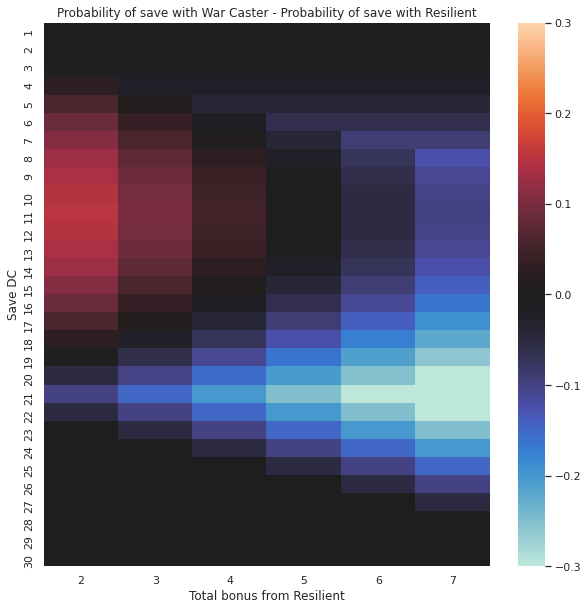

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df
            , vmin=-0.3
            , vmax=0.3
            , cmap='icefire'
            # , square=True
            # , annot=True
            # , fmt='.4f'
           )
plt.title('Probability of save with War Caster - Probability of save with Resilient')
plt.savefig('warcaster_or_resilient_heatmap.png')

In [ ]:
winners = []
for dc in range(1, 31):
  row = []
  probs_row = []
  for bonus in range(2, 8):
    warcaster_and_resilient = dndrv.d20_outcome(dndrv.D20_ADV
                                                , threshold=dc
                                                , modifier=bonus
                                                # , crit_fail_values=[1]
                                                # , crit_success_values=[20]
                                              ).pk[1]
    row.append(warcaster_and_resilient)
  winners.append(row)

df = (
  pd.DataFrame(winners
               , columns=range(2, 8)
               , index=range(1, 31)
              ).rename_axis('Save DC')
               .rename_axis('Total bonus from Resilient', axis='columns')
)

Text(0.5, 1.0, 'Probability of save with War Caster and Resilient')

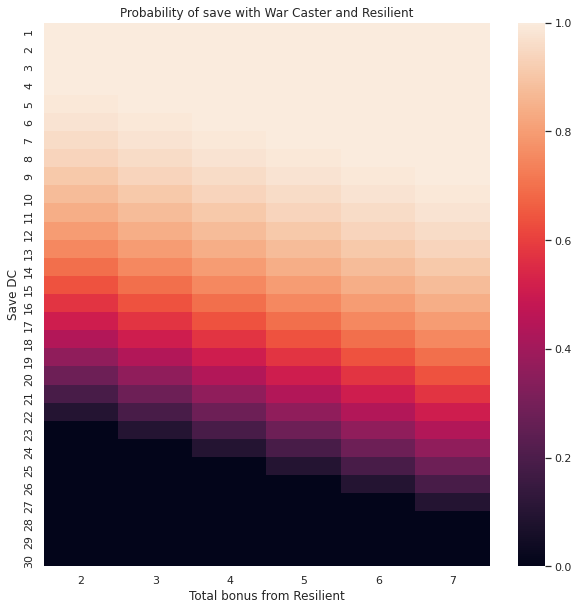

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(
            data=df
            , vmin=0
            , vmax=1
           )
plt.title('Probability of save with War Caster and Resilient')

In [ ]:
import sys
sys.path.append('drive/MyDrive')
from dndrv import *

In [ ]:
rv = 35 + sum(4 * [D6]) + sum(8 * [D8]) + sum(2 * [D10]) + sum(50 * [D8]) + sum(60 * [D8])
sns.reset_orig()

In [ ]:
rv.mean()

591.0000000000001